<a href="https://colab.research.google.com/github/a-forty-two/COG-02082021/blob/main/COG_16_08_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tensorflow- Regression, Classification
# CNN, RNN
# Hyperparameter and Regularization
# Long Short-term memory 


In [2]:
import tensorflow as tf
from tensorflow import keras
fashion = keras.datasets.fashion_mnist

In [3]:
dir(fashion)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [4]:
data = fashion.load_data()
(xtrain,ytrain), (xtest,ytest) = data

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print(len(xtrain))
print(len(ytrain))
print(len(xtest))
print(len(ytest))

60000
60000
10000
10000


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Bag


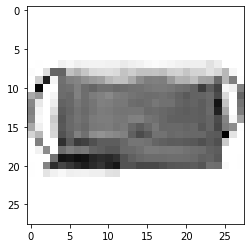

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(xtrain[342], cmap='Greys')
print(class_names[ytrain[342]])

Ankle boot


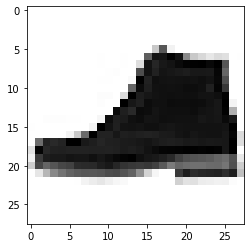

In [21]:
plt.figure()
plt.imshow(xtrain[42], cmap='Greys')
print(class_names[ytrain[42]])

Dress


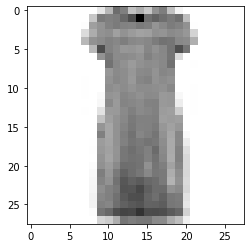

In [22]:
plt.figure()
plt.imshow(xtrain[3442], cmap='Greys')
print(class_names[ytrain[3442]])

In [23]:
xtrain[0][0] # first row of first image

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [24]:
xtrain[0].shape # each image-> 28X28

(28, 28)

In [25]:
xtrain.shape

(60000, 28, 28)

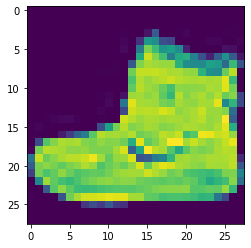

In [26]:
# 0-255-> NORMALIZE? 
# MixMax-> Max-x / Max-min => 255, 0=> 255-x/255-0 => 255-x/255
# But but.... loss = 1-profit, profit = 1-loss 
# 255, 255-x-> done away with 255-(255-x)/255 => x/255
normgraph = xtrain[0]*1.0/255.0
plt.figure()
plt.imshow(normgraph)
# mul/div a vector by a scala-> dir does not change

# -> x-mu/sigma 

In [27]:
xtrainnorm = xtrain*1.0/255
xtestnorm = xtest*1.0/255

In [28]:
# Flatten-> Dense->dense-> Dense(10)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10)
])


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [31]:
# y = x1w1+x2w2+x3w3...... x59648w59648 + b1+b2....b202

# compilation-> fw/bw
# loss-> function on how to calculate cost/loss
# optimizer-> function on how to reduce this cost/loss 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [32]:
history = model.fit(xtrainnorm, ytrain, epochs=50, verbose=1)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5486 - accuracy: 0.8062
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4639 - accuracy: 0.8389
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4488 - accuracy: 0.8442
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4359 - accuracy: 0.8475
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4325 - accuracy: 0.8498
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4247 - accuracy: 0.8511
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4198 - accuracy: 0.8530
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4161 - accuracy: 0.8548
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4143 - accuracy: 0.8550
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.409

In [33]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10)
])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [35]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history2 = model2.fit(xtrainnorm, ytrain, epochs=50, verbose=0)

In [36]:
pred1 = model.predict(xtestnorm)
pred2 = model2.predict(xtestnorm)

In [48]:
import numpy as np
print(pred1[1142])
print(np.argmax(pred1[1142]))
print(class_names[np.argmax(pred1[1142])])

[  1.5793536  -4.8506293   1.5255793  -4.243029    3.2553113 -10.746579
   3.486934   -4.1311255   1.2368399 -11.519061 ]
6
Shirt


In [49]:
print(pred2[1142])
print(np.argmax(pred2[1142]))
print(class_names[np.argmax(pred2[1142])])

[  1.4353652  -5.166031    2.057646   -4.097134    4.206894  -10.962301
   3.8452826  -5.5331874   2.045394  -12.487122 ]
4
Coat


In [50]:
ytest[1142]
print(class_names[ytest[1142]])

Coat


In [51]:
test_loss1, test_acc1 = model.evaluate(xtestnorm,ytest, verbose=0)
test_loss2, test_acc2 = model2.evaluate(xtestnorm,ytest, verbose=0)


In [52]:
print(test_loss1, test_acc1)

0.46119609475135803 0.840399980545044


In [53]:
print(test_loss2, test_acc2)

0.469104140996933 0.8384000062942505


In [54]:
model.save('myclassification.h5')